In [277]:
import pandas as pd
from unidecode import unidecode
from sklearn.preprocessing import LabelEncoder

In [278]:
df = pd.read_excel('base_completa.xlsx')
df.columns = [unidecode(col) for col in df.columns]
df = df.drop('SAC Gest Resp Ouvidoria', axis=1)
df

Situacao  \
0                        Não Contato   
1               Respondeu à Pesquisa   
2                         Em Contato   
3    Inconsistência Carga do Arquivo   
4                         Em Contato   
..                               ...   
495  Inconsistência Carga do Arquivo   
496                       Em Contato   
497             Respondeu à Pesquisa   
498  Inconsistência Carga do Arquivo   
499             Respondeu à Pesquisa   

                                       Motivo           SAC Canal  \
0                     Respondido - Incompleta        2ª Instância   
1                                     OCUPADO        2ª Instância   
2                                  INCOMPLETO              Online   
3    Msg: Operadora/Caixa Postal Não Atendida          SAC Direto   
4                        Tentativas Excedidas  Central Telefônica   
..                                        ...                 ...   
495         Sem telefones válido para contato        1ª Instância   
496                     Respondido - Completa        1ª Instância   
497                                INCOMPLETO  Central Telefônica   
498                                   OCUPADO        2ª Instância   
499         Telefone Errado/Número não Existe          SAC Direto   

              SAC Ass Problema      SAC Sit Manifestacao  \
0                       Fraude     PROCEDENTE SEM ACORDO   
1              Compra/rotativo   IMPROCEDENTE COM ACORDO   
2              Compra/rotativo     PROCEDENTE SEM ACORDO   
3    Contestação de lançamento     PROCEDENTE COM ACORDO   
4                       Fraude     PROCEDENTE SEM ACORDO   
..                         ...                       ...   
495                  Pagamento   IMPROCEDENTE COM ACORDO   
496  Não recebimento do cartão  OUVIDORIA - IMPROCEDENTE   
497                  Pagamento  OUVIDORIA - IMPROCEDENTE   
498  Contestação de lançamento   IMPROCEDENTE SEM ACORDO   
499               Documentação   IMPROCEDENTE SEM ACORDO   

                   SAC Via Entrada SAC Via Solucao  Tempo de Jornada (dias)  \
0                         INTERNET        TELEFONE                       21   
1              RECHAMADA OUVIDORIA          E-MAIL                        8   
2    CENTRAL ATENDIMENTO OUVIDORIA          E-MAIL                       17   
3                         INTERNET          E-MAIL                       18   
4              RECHAMADA OUVIDORIA        TELEFONE                       18   
..                             ...             ...                      ...   
495                       INTERNET          E-MAIL                       14   
496  CENTRAL ATENDIMENTO OUVIDORIA           CARTA                       28   
497                       TELEFONE        TELEFONE                       14   
498                       TELEFONE          E-MAIL                       14   
499                       TELEFONE        TELEFONE                       14   

         Satisfacao  
0                 4  
1                 2  
2                 5  
3    Não Respondido  
4                 4  
..              ...  
495               3  
496               2  
497               3  
498               5  
499               5  

[500 rows x 9 columns]

In [279]:
df['Satisfacao'].value_counts()

Satisfacao
4                 98
1                 85
5                 81
2                 79
3                 79
Não Respondido    78
Name: count, dtype: int64

In [280]:
df['Satisfacao'].value_counts() / df.shape[0]

Satisfacao
4                 0.196
1                 0.170
5                 0.162
2                 0.158
3                 0.158
Não Respondido    0.156
Name: count, dtype: float64

In [281]:
df_num = pd.get_dummies(df)
df_num.columns = [unidecode(col) for col in df_num.columns]
df_num

Tempo de Jornada (dias)  Situacao_Em Contato  \
0                         21                False   
1                          8                False   
2                         17                 True   
3                         18                False   
4                         18                 True   
..                       ...                  ...   
495                       14                False   
496                       28                 True   
497                       14                False   
498                       14                False   
499                       14                False   

     Situacao_Inconsistencia Carga do Arquivo  Situacao_Nao Contato  \
0                                       False                  True   
1                                       False                 False   
2                                       False                 False   
3                                        True                 False   
4                                       False                 False   
..                                        ...                   ...   
495                                      True                 False   
496                                     False                 False   
497                                     False                 False   
498                                      True                 False   
499                                     False                 False   

     Situacao_Respondeu a Pesquisa  Motivo_1  Motivo_DESLIGOU  \
0                            False     False            False   
1                             True     False            False   
2                            False     False            False   
3                            False     False            False   
4                            False     False            False   
..                             ...       ...              ...   
495                          False     False            False   
496                          False     False            False   
497                           True     False            False   
498                          False     False            False   
499                           True     False            False   

     Motivo_INCOMPLETO  Motivo_Msg: Operadora/Caixa Postal Nao Atendida  \
0                False                                            False   
1                False                                            False   
2                 True                                            False   
3                False                                             True   
4                False                                            False   
..                 ...                                              ...   
495              False                                            False   
496              False                                            False   
497               True                                            False   
498              False                                            False   
499              False                                            False   

     Motivo_OCUPADO  ...  SAC Via Entrada_TELEFONE  SAC Via Solucao_CARTA  \
0             False  ...                     False                  False   
1              True  ...                     False                  False   
2             False  ...                     False                  False   
3             False  ...                     False                  False   
4             False  ...                     False                  False   
..              ...  ...                       ...                    ...   
495           False  ...                     False                  False   
496           False  ...                     False                   True   
497           False  ...                      True                  False   
498            True  ...                      True             

In [282]:
x = df_num.div(df_num.sum(axis=1), axis='rows')
x

Tempo de Jornada (dias) Situacao_Em Contato  \
0                  0.724138                 0.0   
1                       0.5                 0.0   
2                      0.68                0.04   
3                  0.692308                 0.0   
4                  0.692308            0.038462   
..                      ...                 ...   
495                0.636364                 0.0   
496                0.777778            0.027778   
497                0.636364                 0.0   
498                0.636364                 0.0   
499                0.636364                 0.0   

    Situacao_Inconsistencia Carga do Arquivo Situacao_Nao Contato  \
0                                        0.0             0.034483   
1                                        0.0                  0.0   
2                                        0.0                  0.0   
3                                   0.038462                  0.0   
4                                        0.0                  0.0   
..                                       ...                  ...   
495                                 0.045455                  0.0   
496                                      0.0                  0.0   
497                                      0.0                  0.0   
498                                 0.045455                  0.0   
499                                      0.0                  0.0   

    Situacao_Respondeu a Pesquisa Motivo_1 Motivo_DESLIGOU Motivo_INCOMPLETO  \
0                             0.0      0.0             0.0               0.0   
1                          0.0625      0.0             0.0               0.0   
2                             0.0      0.0             0.0              0.04   
3                             0.0      0.0             0.0               0.0   
4                             0.0      0.0             0.0               0.0   
..                            ...      ...             ...               ...   
495                           0.0      0.0             0.0               0.0   
496                           0.0      0.0             0.0               0.0   
497                      0.045455      0.0             0.0          0.045455   
498                           0.0      0.0             0.0               0.0   
499                      0.045455      0.0             0.0               0.0   

    Motivo_Msg: Operadora/Caixa Postal Nao Atendida Motivo_OCUPADO  ...  \
0                                               0.0            0.0  ...   
1                                               0.0         0.0625  ...   
2                                               0.0            0.0  ...   
3                                          0.038462            0.0  ...   
4                                               0.0            0.0  ...   
..                                              ...            ...  ...   
495                                             0.0            0.0  ...   
496                                             0.0            0.0  ...   
497                                             0.0            0.0  ...   
498                                             0.0       0.045455  ...   
499                                             0.0            0.0  ...   

    SAC Via Entrada_TELEFONE SAC Via Solucao_CARTA SAC Via Solucao_E-MAIL  \
0                        0.0                   0.0                    0.0   
1                        0.0                   0.0                 0.0625   
2                        0.0                   0.0                   0.04   
3                        0.0                   0.0               0.038462   
4                        0.0                   0.0                    0.0   
..                       ...                   ...                    ...   
495                      0.0                   0.0               0.045455   
496                      0.0              0.027778                    0.0   
497    

In [283]:
from sklearn.cluster import KMeans

In [284]:
km = KMeans(n_clusters=3)
km.fit_predict(x)

array([0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [285]:
distortions = []

n_clusters = range(1, 15)
for n_clus in n_clusters:
    distortions.append(KMeans(n_clusters=n_clus, max_iter=10_000, n_init=100, random_state=61658).fit(x).inertia_)

In [286]:
distortions

[19.781786569680314,
 11.385588129931662,
 10.223302219910295,
 9.350525299431906,
 9.091910627432261,
 8.857038045948068,
 8.63787201351892,
 8.425341164916729,
 8.263951066238752,
 8.178973588796126,
 8.078251280355579,
 7.987274457341977,
 7.896059420184406,
 7.787147031926836]

In [287]:
import matplotlib.pyplot as plt

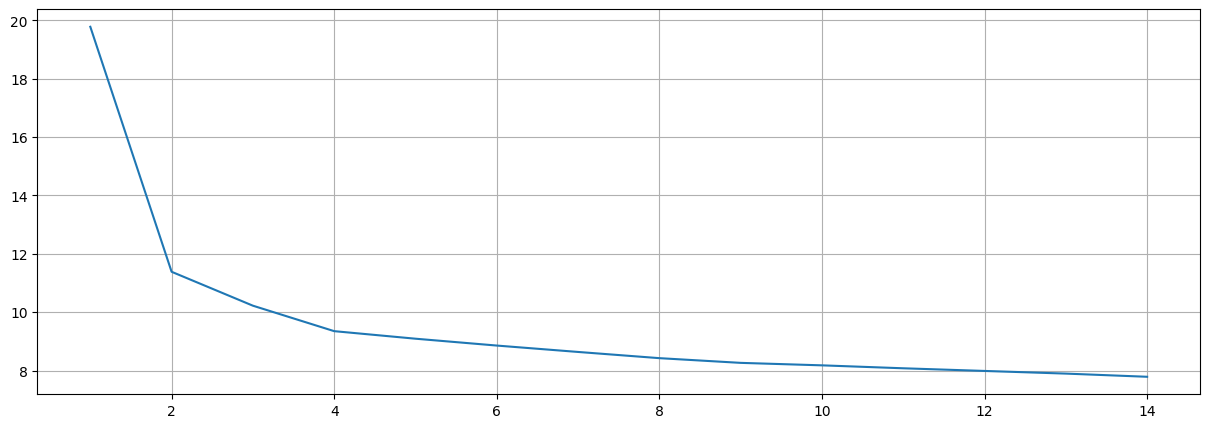

In [288]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

In [289]:
km = KMeans(n_clusters=2, max_iter=10_000, n_init=100, random_state=61658)
X_t = km.fit_predict(x)
X_t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [290]:
df_num.loc[:, 'clus'] = X_t
df.loc[:, 'clus'] = X_t
df_num

Tempo de Jornada (dias)  Situacao_Em Contato  \
0                         21                False   
1                          8                False   
2                         17                 True   
3                         18                False   
4                         18                 True   
..                       ...                  ...   
495                       14                False   
496                       28                 True   
497                       14                False   
498                       14                False   
499                       14                False   

     Situacao_Inconsistencia Carga do Arquivo  Situacao_Nao Contato  \
0                                       False                  True   
1                                       False                 False   
2                                       False                 False   
3                                        True                 False   
4                                       False                 False   
..                                        ...                   ...   
495                                      True                 False   
496                                     False                 False   
497                                     False                 False   
498                                      True                 False   
499                                     False                 False   

     Situacao_Respondeu a Pesquisa  Motivo_1  Motivo_DESLIGOU  \
0                            False     False            False   
1                             True     False            False   
2                            False     False            False   
3                            False     False            False   
4                            False     False            False   
..                             ...       ...              ...   
495                          False     False            False   
496                          False     False            False   
497                           True     False            False   
498                          False     False            False   
499                           True     False            False   

     Motivo_INCOMPLETO  Motivo_Msg: Operadora/Caixa Postal Nao Atendida  \
0                False                                            False   
1                False                                            False   
2                 True                                            False   
3                False                                             True   
4                False                                            False   
..                 ...                                              ...   
495              False                                            False   
496              False                                            False   
497               True                                            False   
498              False                                            False   
499              False                                            False   

     Motivo_OCUPADO  ...  SAC Via Solucao_CARTA  SAC Via Solucao_E-MAIL  \
0             False  ...                  False                   False   
1              True  ...                  False                    True   
2             False  ...                  False                    True   
3             False  ...                  False                    True   
4             False  ...                  False                   False   
..              ...  ...                    ...                     ...   
495           False  ...                  False                    True   
496           False  ...                   True                   False   
497           False  ...                  False                   False   
498            True  ...                  False                    True   
499     

In [291]:
import numpy as np

In [292]:
output_data = []

In [293]:
for col in df.drop('clus', axis=1).columns:
    for cl in np.sort(df.clus.unique()):
        if df.dtypes[col] == object:
            vc = 100 * df.loc[df.clus == cl, col].value_counts() / (df.clus == cl).sum()
            for cat, cnt in vc.reset_index().values:
                output_data.append([cl, f'{col}_{str(cat)}', f'{cnt:5.2f}%'.replace('.', ',')])
                print([cl, f'{col}_{str(cat)}', f'{cnt:5.2f}%'.replace('.', ',')])
        else:
            output_data.append([cl, col, f'{df.loc[df.clus == cl, col].mean():.2f}'.replace('.', ',')])
            print([cl, col, f'{df.loc[df.clus == cl, col].mean():.2f}'.replace('.', ',')])

for col in df.drop('clus', axis=1).columns:
    if df.dtypes[col] == object:
        vc = 100 * df[col].value_counts() / (df.shape[0])
        for cat, cnt in vc.reset_index().values:
            output_data.append(['All', f'{col}_{str(cat)}', f'{cnt:5.2f}%'.replace('.', ',')])
            print(['All', f'{col}_{str(cat)}', f'{cnt:5.2f}%'.replace('.', ',')])
    else:
        output_data.append(['All', col, f'{df[col].mean():.2f}'.replace('.', ',')])
        print(['All', col, f'{df[col].mean():.2f}'.replace('.', ',')])


[0, 'Situacao_Em Contato', '27,00%']
[0, 'Situacao_Inconsistência Carga do Arquivo', '26,32%']
[0, 'Situacao_Não Contato', '23,57%']
[0, 'Situacao_Respondeu à Pesquisa', '23,11%']
[1, 'Situacao_Inconsistência Carga do Arquivo', '31,75%']
[1, 'Situacao_Respondeu à Pesquisa', '26,98%']
[1, 'Situacao_Em Contato', '20,63%']
[1, 'Situacao_Não Contato', '20,63%']
[0, 'Motivo_Respondido - Incompleta', '11,44%']
[0, 'Motivo_OCUPADO', '10,76%']
[0, 'Motivo_DESLIGOU', '10,76%']
[0, 'Motivo_Sem telefones válido para contato', '10,53%']
[0, 'Motivo_Telefone Errado/Número não Existe', '10,30%']
[0, 'Motivo_Respondido - Completa', '10,30%']
[0, 'Motivo_INCOMPLETO', ' 9,84%']
[0, 'Motivo_Tentativas Excedidas', ' 9,15%']
[0, 'Motivo_Msg: Operadora/Caixa Postal Não Atendida', ' 8,47%']
[0, 'Motivo_1', ' 8,47%']
[1, 'Motivo_Respondido - Completa', '14,29%']
[1, 'Motivo_Msg: Operadora/Caixa Postal Não Atendida', '12,70%']
[1, 'Motivo_Respondido - Incompleta', '12,70%']
[1, 'Motivo_INCOMPLETO', '11,11%']


In [295]:
output_df = pd.DataFrame(output_data, columns=['cluster', 'campo', 'valor'])

output_df.to_excel('resultado.xlsx', index=False)